<a href="https://colab.research.google.com/github/samuelmat/DSPS_sMatylewicz/blob/master/HW6/Lab_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import scipy as sp
from scipy import optimize
import numpy as np
from matplotlib import pylab as pl

In [0]:
np.random.seed(555)

In [0]:
x_vals = np.random.rand(100) * 10

In [0]:
x_vals

array([7.17834087, 0.47855133, 9.44471978, 6.8638004 , 5.81207334,
       1.42678616, 9.45919181, 3.39990587, 6.20435458, 4.52959644,
       2.3976742 , 0.34504591, 1.48593113, 8.10866174, 6.53105376,
       5.44468685, 0.41194765, 4.68166251, 8.88746733, 4.76258557,
       4.12488984, 6.16106538, 3.21416554, 5.80869263, 3.9661405 ,
       0.20091368, 4.31395898, 4.11244512, 6.29061747, 5.02521894,
       1.6212784 , 6.66897061, 1.35272291, 1.69937536, 2.20830313,
       0.86670475, 0.46840069, 0.28908051, 4.3867962 , 8.08565064,
       6.13362455, 6.6097222 , 9.28622121, 4.87345755, 6.38178521,
       1.85093821, 2.50653771, 4.46628009, 9.72624065, 4.67703036,
       4.07470269, 7.86091879, 3.71535104, 2.20143415, 3.07846727,
       2.86184245, 1.47343012, 7.42969034, 7.94321078, 3.2902046 ,
       0.62102981, 9.66696377, 0.34688228, 7.92288645, 0.2252943 ,
       1.59693565, 1.46141363, 8.8278803 , 1.89545066, 3.34775168,
       4.09820686, 0.57803204, 5.42383827, 8.46712172, 8.24706

In [0]:
def line(x, a, b):
  """
  Takes two parameters (a and b) along with an array of x values. Return y array
  """
  
  return a * x + b

In [0]:
y_vals = line(x_vals, 4, 3)

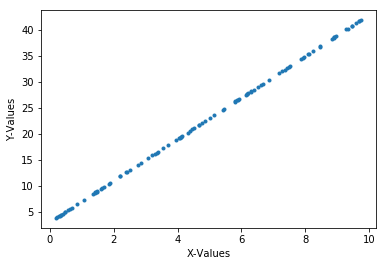

In [0]:
pl.plot(x_vals, y_vals, ".")
pl.xlabel("X-Values")
pl.ylabel("Y-Values");

In [0]:
scattered_y = np.random.randn(100) * 5

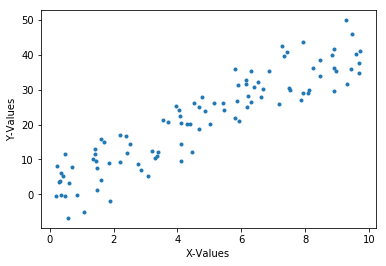

In [0]:
y_vals += scattered_y

pl.plot(x_vals, y_vals, ".")
pl.xlabel("X-Values")
pl.ylabel("Y-Values");

In [0]:
uncertainties = np.random.randn(100) * 7

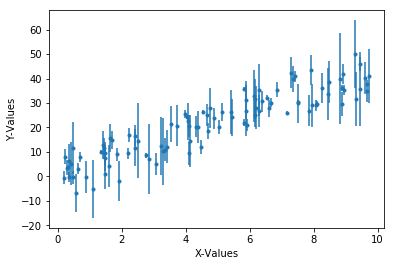

In [0]:
pl.errorbar(x_vals, y_vals, yerr = uncertainties, fmt = ".")
pl.xlabel("X-Values")
pl.ylabel("Y-Values");

In [0]:
popt, pcov = sp.optimize.curve_fit(line, x_vals, y_vals, p0 = [5, 0])

In [0]:
pcov

array([[ 0.03279955, -0.15642658],
       [-0.15642658,  1.02770122]])

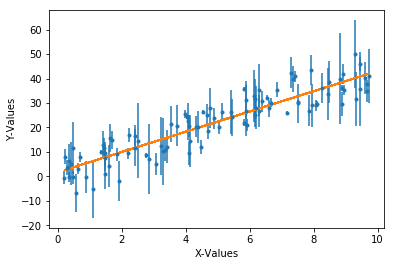

In [0]:
pl.errorbar(x_vals, y_vals, yerr = uncertainties, fmt = ".")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), "-")
pl.xlabel("X-Values")
pl.ylabel("Y-Values")

pl.fill_between(x_vals, line(x_vals, popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5), 
                line(x_vals, popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5), alpha = 0.5)

In [0]:
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
regr = skl.linear_model.LinearRegression()
regr.fit(np.atleast_2d(x_vals).T, y_vals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

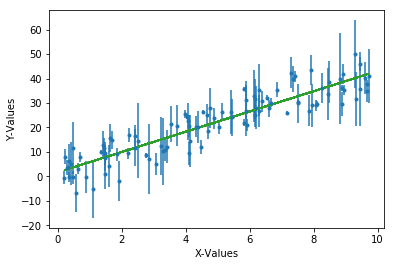

In [0]:
pl.errorbar(x_vals, y_vals, yerr = uncertainties, fmt = ".")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), "-")
pl.xlabel("X-Values")
pl.ylabel("Y-Values")

pl.plot(x_vals, regr.predict(np.atleast_2d(x_vals).T))

In [0]:
regr.score(np.atleast_2d(x_vals).T, y_vals)

0.8416082125726227

In [0]:
regr.fit(np.atleast_2d(x_vals[75:]).T, y_vals[75:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
regr.score(np.atleast_2d(x_vals[75:]).T, y_vals[75:])

0.8210434102157635

In [0]:
y_vals

array([26.00681266, 11.62159523, 35.81891012, 35.47175906, 22.00546844,
       11.49855468, 45.87963252, 12.13631956, 28.05085164, 26.29011992,
       16.71555942, -0.21194619,  1.14403105, 29.79482019, 32.2272704 ,
       24.14547816,  5.21495059, 18.59823394, 36.14140679, 27.985038  ,
       14.45448906, 31.62626987, 12.51989847, 35.78495891, 25.45275106,
       -0.59273919, 20.28696373,  9.42669387, 35.32679079, 20.1619124 ,
       15.76083183, 30.12234776, 10.1679762 , 14.93025862, 16.97396902,
       -0.1296428 , -0.40182803,  3.62976055, 20.1868889 , 29.07343846,
       32.8570003 , 27.77242725, 49.88712308, 23.76525451, 30.695412  ,
        8.98141351, 14.55810318, 12.03691127, 41.08200067, 25.00788073,
       22.48009323, 26.90738417, 20.67926243,  9.42326601,  5.14358818,
        7.09142279,  7.58882791, 40.82626352, 28.98804662, 10.3462773 ,
        3.1455486 , 34.84318779,  6.21336   , 43.56242213,  8.03735234,
        4.22059025,  9.43095264, 39.99520212, -1.98598321, 10.97

<ErrorbarContainer object of 3 artists>

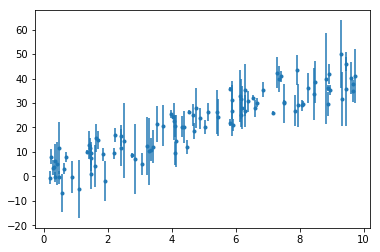

In [0]:
pl.errorbar(x_vals, y_vals, yerr = uncertainties, fmt = '.')

In [0]:
line?

In [0]:
def chi_square(data, xvals, a, b, unc):
  residuals = data - line(xvals, a, b)
  r_square = residuals**2
  chi_square = r_square / unc**2
  return chi_square.sum()

In [0]:
chi_square(y_vals, x_vals, 3, 4, uncertainties)

1269.4991739989648

In [0]:
chi2 = np.zeros((100, 100))

for i, a in enumerate(np.arange(0, 10, 0.1)):
  for j, b in enumerate(np.arange(0, 10, 0.1)):
    chi2[i,j] = chi_square(y_vals, x_vals, a, b, uncertainties)

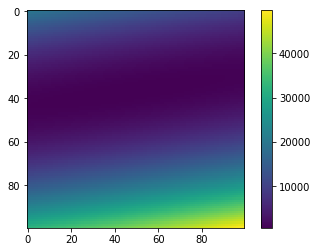

In [0]:
pl.imshow(chi2)
pl.colorbar();